# Associate spindle/ripples and Ca2+ signal for multiple minian files
SHORT and focus on PFC

In [1]:
cd "C:/Users/Manip2/SCRIPTS/Code python audrey/code python aurelie/interfaceJupyter/minian"

C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian


In [2]:
import quantities as pq
import numpy as np
import neo
from pathlib import Path
import xarray as xr
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
%matplotlib widget

from ephyviewer import mkQApp, MainViewer, TraceViewer

from minian.utilities import (
    TaskAnnotation,
    get_optimal_chk,
    load_videos,
    open_minian,
    save_minian,
)

In [18]:
folder_base = Path('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/Gaelle/Baseline_recording/ThreeBlueCrossesOK/')

nb_sessions = sum(1 for p in folder_base.iterdir() if p.is_dir() and p.name.startswith("session"))

sessions = []
subsessions = []
nb_minian_total=0

dict_minian = {}
dict_SWRprop = {}
dict_PFCspiprop = {}
dict_stamps = {}
dict_Acq_freq = {}
dict_stamps_miniscope = {}
dict_unit_to_drop = {}
dict_All_units = {}
dict_folder_MinisSess = {}

for y in range(1, nb_sessions+1):
    session= 'session' + str(y)
    print(session)
    sessions.append(session)
    folder_Ephys = folder_base / f'session{y}/OpenEphys/'
    filenameE = folder_Ephys / f'SWRproperties.csv'
    SWRprop = pd.read_csv(filenameE)
    filenameE = folder_Ephys / f'Spindleproperties_PFC.csv'
    PFCspiprop = pd.read_csv(filenameE)
    filenameB = folder_base / f'session{y}/SynchroFile.xlsx'
    stamps = pd.read_excel(filenameB)
    Acq_freq = (list(stamps[0])[2])
    for file_path in folder_base.glob('**/timeStamps.csv'):
        subfolder = file_path.parents[0].stem
        if subfolder == 'V4_Miniscope':
            stamps_miniscope = pd.read_csv(file_path)
    folder_mini = folder_base / f'session{y}/V4_Miniscope'
    nb_subsessions = sum(1 for p in folder_mini.iterdir() if p.is_dir() and p.name.startswith("session"))
    if nb_subsessions!=0:
        for x in range(1, nb_subsessions+1):
            nb_minian_total+=1
            subsession= "session"  + str(y) + str(x)
            subsessions.append(subsession)
            print(subsession)
            folder_MinisSess = folder_mini / subsession / 'minian'
            
            TodropFile = folder_MinisSess / f'TodropFileAB.json'
            with open(TodropFile, 'r') as f:
                unit_to_drop = json.load(f)

            AllUnitsFile = folder_MinisSess / f'AllunitsFile.json'
            with open(AllUnitsFile, 'r') as f:
                All_units = json.load(f)

            UnitToKeepL = [e for e in All_units if e not in unit_to_drop]
            UnitToKeepInd = [e for e, elem in enumerate(All_units) if elem in UnitToKeepL]
            
            dict_minian[subsession] = open_minian(folder_MinisSess)

            dict_SWRprop[subsession] =SWRprop 
            dict_PFCspiprop[subsession] =PFCspiprop
            dict_stamps[subsession] = stamps
            dict_Acq_freq[subsession] = Acq_freq
            dict_stamps_miniscope[subsession] = stamps_miniscope
            dict_unit_to_drop[subsession] =unit_to_drop
            dict_All_units[subsession] =All_units
            dict_folder_MinisSess[subsession]=folder_MinisSess

    else:
        nb_minian_total+=1  
        folder_MinisSess = folder_mini / 'minian'
        TodropFile = folder_MinisSess / f'TodropFileAB.json'
        with open(TodropFile, 'r') as f:
            unit_to_drop = json.load(f)

        AllUnitsFile = folder_MinisSess / f'AllunitsFile.json'
        with open(AllUnitsFile, 'r') as f:
            All_units = json.load(f)

        UnitToKeepL = [e for e in All_units if e not in unit_to_drop]
        UnitToKeepInd = [e for e, elem in enumerate(All_units) if elem in UnitToKeepL]
        
        dict_minian[session] = open_minian(folder_MinisSess)

        dict_SWRprop[session] =SWRprop 
        dict_PFCspiprop[session] =PFCspiprop
        dict_stamps[session] = stamps
        dict_Acq_freq[session] = Acq_freq
        dict_stamps_miniscope[session] = stamps_miniscope
        dict_unit_to_drop[session] =unit_to_drop
        dict_All_units[session] =All_units
        dict_folder_MinisSess[session]=folder_MinisSess


session1


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

session2
session21


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

session22


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

session23


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]


session3
session31


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

session32


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]


In [19]:
dict_folder_MinisSess


{'session1': WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/Gaelle/Baseline_recording/ThreeBlueCrossesOK/session1/V4_Miniscope/minian'),
 'session21': WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/Gaelle/Baseline_recording/ThreeBlueCrossesOK/session2/V4_Miniscope/session21/minian'),
 'session22': WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/Gaelle/Baseline_recording/ThreeBlueCrossesOK/session2/V4_Miniscope/session22/minian'),
 'session23': WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/Gaelle/Baseline_recording/ThreeBlueCrossesOK/session2/V4_Miniscope/session23/minian'),
 'session31': WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/Gaelle/Baseline_recording/ThreeBlueCrossesOK/session3/V4_Miniscope/session31/minian'),
 'session32': WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/L1imaging/AnalysedMarch2023/

In [21]:
dict_StartTime = {}
dict_EndTime = {}
dict_RecDur = {}

for i in dict_minian:  
    print(i)

    # start time
    StartTime1 = (list(dict_stamps[i][0])[0])
    dict_StartTime[i] = StartTime1

    # start time session 2
    def Convert(string):
        li = list(string.split(", "))
        li2 = len(li)
        return li2
    stri = dict_stamps[i][0][3]

    numbdropfr = Convert(stri)

    from ast import literal_eval
    list_droppedframes = literal_eval(dict_stamps[i][0][3])

    folder_MinisSess=dict_folder_MinisSess[i]
    minian_ds = open_minian(folder_MinisSess)
    C = minian_ds['C']
    dict_RecDur[i] = C.shape[1]
    if len(list_droppedframes) > 0:
        numbdropfr = len(list(item for item in range(numbdropfr) if list_droppedframes[item] < dict_RecDur[i]))
    else:
        numbdropfr = 0
    dict_EndTime[i] = dict_StartTime[i] + (dict_RecDur[i] + numbdropfr)/stamps[0][2]
    #if i < numbsubsession:
    #    dict_StartTime[i+1] = dict_EndTime[i]

    print(dict_StartTime[i])
    print(dict_EndTime[i])
    print(dict_RecDur[i])

session1


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

5.22324
669.9899066666667
19943
session21


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

2.33568
1002.3690133333333
30000
session22


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

2.33568
1002.3690133333333
30000
session23


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

2.33568
1331.4690133333334
39873
session31


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

2.89656
1036.2298933333332
31000
session32


C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  arr = list(xr.open_zarr(arr_path).values())[0]
C:\Users\Manip2\SCRIPTS\Code python audrey\code python aurelie\interfaceJupyter\minian\minian\utilities.py:342: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, c

2.89656
1030.1965599999999
30819


In [24]:
from bisect import bisect_left

def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return 0
    if pos == len(myList):
        return len(myList)
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

def take_closest2(myList, myNumber):
    value2 = 10000000
    for ind in range(len(myList)):
        value = abs(myList[ind]-myNumber)
        if value < value2:
            value2 = value
            index = myList[ind]
    return index


def take_closest3(myList, myNumber):
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        dummy = myList.index(after)
        return dummy
    else:
        dummy = myList.index(before)
        return dummy

In [25]:
StartTime = dict_StartTime[subsession]
EndTime = dict_EndTime[subsession]
rec_dur = dict_RecDur[subsession]
minian_ds = dict_minian[f"ds_minian{subsession}"]


PFCspiprop[["peak time", "start time", "end time"]] = PFCspiprop[["peak time", "start time", "end time"]]-(list(stamps[0])[0]*1000)
SWRprop[["peak time", "start time", "end time"]] = SWRprop[["peak time", "start time", "end time"]]-(list(stamps[0])[0]*1000)

C = minian_ds['C']
A = minian_ds['A']
B = A['unit_id']
A = minian_ds['A']
B = A['unit_id']
copyB = list(B.copy())
print(copyB)

for i in range(len(unit_to_drop)):
    elem = unit_to_drop[i]
    copyB.remove(elem)
unit_to_keep = copyB

C = C.loc[unit_to_keep,:]
nb_unit = C.shape[0]
rec_dur = C.shape[1]

StartTimeIndexSpi = take_closest3(list(PFCspiprop["start time"]), StartTime*1000)
EndTimeIndex = take_closest3(list(PFCspiprop["start time"]), EndTime*1000)

if StartTimeIndexSpi > len(list(PFCspiprop["start time"])):
    StartTimeIndexSpi = 0
if EndTimeIndex > len(list(PFCspiprop["start time"])):
    EndTimeIndex = len(list(PFCspiprop["start time"]))

PFCspiprop = PFCspiprop[StartTimeIndexSpi:EndTimeIndex]

StartTimeIndex = take_closest3(list(SWRprop["start time"]), StartTime*1000)
EndTimeIndex = take_closest3(list(SWRprop["start time"]), EndTime*1000)
if StartTimeIndex > len(list(SWRprop["start time"])):
    StartTimeIndex = 0
if EndTimeIndex > len(list(SWRprop["start time"])):
    EndTimeIndex = len(list(SWRprop["start time"]))

SWRprop = SWRprop[StartTimeIndex:EndTimeIndex]

[<xarray.DataArray 'unit_id' ()>
array(0, dtype=int64)
Coordinates:
    animal   <U12 'ThreeColDots'
    session  <U9 'session11'
    unit_id  int64 0, <xarray.DataArray 'unit_id' ()>
array(1, dtype=int64)
Coordinates:
    animal   <U12 'ThreeColDots'
    session  <U9 'session11'
    unit_id  int64 1, <xarray.DataArray 'unit_id' ()>
array(4, dtype=int64)
Coordinates:
    animal   <U12 'ThreeColDots'
    session  <U9 'session11'
    unit_id  int64 4, <xarray.DataArray 'unit_id' ()>
array(5, dtype=int64)
Coordinates:
    animal   <U12 'ThreeColDots'
    session  <U9 'session11'
    unit_id  int64 5, <xarray.DataArray 'unit_id' ()>
array(6, dtype=int64)
Coordinates:
    animal   <U12 'ThreeColDots'
    session  <U9 'session11'
    unit_id  int64 6, <xarray.DataArray 'unit_id' ()>
array(8, dtype=int64)
Coordinates:
    animal   <U12 'ThreeColDots'
    session  <U9 'session11'
    unit_id  int64 8, <xarray.DataArray 'unit_id' ()>
array(10, dtype=int64)
Coordinates:
    animal   <U12 'ThreeC

In [26]:
Struct = "PFC"
before = 1000 # ms
after = 1000 # ms
counterPrePFC = 0
counterPostPFC = 0
PreCoupled_spindlesPFC = list()
PostCoupled_spindlesPFC = list()
unCoupled_spindlesPFC = list()

nb_spindle = PFCspiprop.shape[0]
for Pspin in range(nb_spindle):
    ser = pd.Series(PFCspiprop["start time"])
    serSWR = list(pd.Series(SWRprop["start time"]))
    Combined_Spindle_SWR = take_closest2(serSWR, ser[Pspin + StartTimeIndexSpi])
    distance = Combined_Spindle_SWR - ser[Pspin + StartTimeIndexSpi]
    if (distance > (- before)) and (distance <  0):
        counterPrePFC = counterPrePFC + 1
        PreCoupled_spindlesPFC.append(Pspin)
    elif (distance > (0)) and (distance <  after):
        counterPostPFC = counterPostPFC + 1
        PostCoupled_spindlesPFC.append(Pspin)
    else:
        unCoupled_spindlesPFC.append(Pspin)

print(len(PreCoupled_spindlesPFC), len(PostCoupled_spindlesPFC), len(unCoupled_spindlesPFC))
#print(len(PreCoupled_spindlesPFC)/nb_spindle)
#print(len(PostCoupled_spindlesPFC)/nb_spindle)

4 4 1


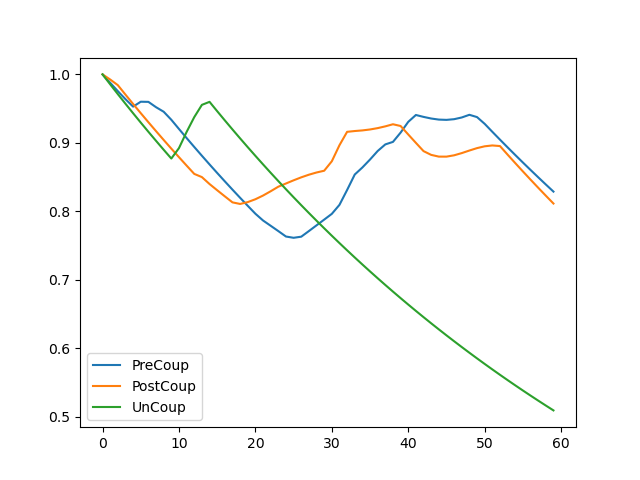

In [27]:
Cseries = C.to_series()
unit_to_keep = range(len(UnitToKeepInd))
duration = 1
Struct = "PFC"
threshold = 0.1

ActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
ActivityCa_SWR = pd.Series(np.zeros(duration*2*Acq_freq))
time = range(duration*2*Acq_freq)
Half = int(ActivityCa_PFCspin.shape[0]/2)
TimeStamps_miniscope = list(stamps_miniscope["Time Stamp (ms)"] + (StartTime*1000))
plt.close()

AVGActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
nAVGActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
for unit in unit_to_keep:
    ActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
    lCseries = np.array(Cseries)[(unit)*rec_dur:(unit+1)*rec_dur]
    for Pspin in PreCoupled_spindlesPFC:
        ser = list(pd.Series(PFCspiprop["start time"]))
        Frame_Spindle_start = take_closest2(TimeStamps_miniscope, ser[Pspin])
        index = TimeStamps_miniscope.index(Frame_Spindle_start)
        trace = list(lCseries[index-Half:index+Half])
        if len(trace)<len(time):
            print("pre, unit = ", unit, "spindle = ", Pspin)
        else:
            ActivityCa_PFCspin = ActivityCa_PFCspin+list(lCseries[index-Half:index+Half])
    if max(ActivityCa_PFCspin)>(len(PreCoupled_spindlesPFC)*threshold):
        nActivityCa_PFCspin = ActivityCa_PFCspin/max(ActivityCa_PFCspin)
    else:
        nActivityCa_PFCspin = 0#ActivityCa_PFCspin
    
    AVGActivityCa_PFCspin = AVGActivityCa_PFCspin + ActivityCa_PFCspin    
    nAVGActivityCa_PFCspin = nAVGActivityCa_PFCspin + nActivityCa_PFCspin 

if max(AVGActivityCa_PFCspin)>(threshold):
    nAVGActivityCa_PFCspin = AVGActivityCa_PFCspin/max(AVGActivityCa_PFCspin)
else:
    nAVGActivityCa_PFCspin = AVGActivityCa_PFCspin

plt.plot(time, nAVGActivityCa_PFCspin, label='PreCoup')  

prCactBefore = sum(AVGActivityCa_PFCspin[0:Half])
prCactAfter = sum(AVGActivityCa_PFCspin[Half:2*Half])
nprCactBefore = sum(nAVGActivityCa_PFCspin[0:Half])
nprCactAfter = sum(nAVGActivityCa_PFCspin[Half:2*Half])


AVGActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
nAVGActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
for unit in unit_to_keep:
    ActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
    lCseries = np.array(Cseries)[(unit)*rec_dur:(unit+1)*rec_dur]
    for Pspin in PostCoupled_spindlesPFC:
        ser = list(pd.Series(PFCspiprop["start time"]))
        Frame_Spindle_start = take_closest2(TimeStamps_miniscope, ser[Pspin])
        index = TimeStamps_miniscope.index(Frame_Spindle_start)
        trace = list(lCseries[index-Half:index+Half])
        if len(trace)<len(time):
            print("post, unit = ", unit, "spindle = ", Pspin)
        else:
            ActivityCa_PFCspin = ActivityCa_PFCspin+list(lCseries[index-Half:index+Half])
    if max(ActivityCa_PFCspin)>(len(PostCoupled_spindlesPFC)*threshold):
        nActivityCa_PFCspin = ActivityCa_PFCspin/max(ActivityCa_PFCspin)
    else:
        nActivityCa_PFCspin = 0#ActivityCa_PFCspin
    AVGActivityCa_PFCspin = AVGActivityCa_PFCspin + ActivityCa_PFCspin    
    nAVGActivityCa_PFCspin = nAVGActivityCa_PFCspin + nActivityCa_PFCspin 

if max(AVGActivityCa_PFCspin)>(threshold):
    nAVGActivityCa_PFCspin = AVGActivityCa_PFCspin/max(AVGActivityCa_PFCspin)
else:
    nAVGActivityCa_PFCspin = AVGActivityCa_PFCspin

plt.plot(time, nAVGActivityCa_PFCspin, label='PostCoup')  
poCactBefore = sum(AVGActivityCa_PFCspin[0:Half])
poCactAfter = sum(AVGActivityCa_PFCspin[Half:2*Half])
npoCactBefore = sum(nAVGActivityCa_PFCspin[0:Half])
npoCactAfter = sum(nAVGActivityCa_PFCspin[Half:2*Half])

AVGActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
nAVGActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
for unit in unit_to_keep:
    ActivityCa_PFCspin = pd.Series(np.zeros(duration*2*Acq_freq))
    lCseries = np.array(Cseries)[(unit)*rec_dur:(unit+1)*rec_dur]
    for Pspin in unCoupled_spindlesPFC:
        ser = list(pd.Series(PFCspiprop["start time"]))
        Frame_Spindle_start = take_closest2(TimeStamps_miniscope, ser[Pspin])
        index = TimeStamps_miniscope.index(Frame_Spindle_start)
        trace = list(lCseries[index-Half:index+Half])
        if len(trace)<len(time):
            print("post, unit = ", unit, "spindle = ", Pspin)
        else:
            ActivityCa_PFCspin = ActivityCa_PFCspin+list(lCseries[index-Half:index+Half])
    if max(ActivityCa_PFCspin)>(len(unCoupled_spindlesPFC)*threshold):
        nActivityCa_PFCspin = ActivityCa_PFCspin/max(ActivityCa_PFCspin)
    else:
        nActivityCa_PFCspin = 0#ActivityCa_PFCspin
    AVGActivityCa_PFCspin = AVGActivityCa_PFCspin + ActivityCa_PFCspin    
    nAVGActivityCa_PFCspin = nAVGActivityCa_PFCspin + nActivityCa_PFCspin 

if max(AVGActivityCa_PFCspin)>(threshold):
    nAVGActivityCa_PFCspin = AVGActivityCa_PFCspin/max(AVGActivityCa_PFCspin)
else:
    nAVGActivityCa_PFCspin = AVGActivityCa_PFCspin

plt.plot(time, nAVGActivityCa_PFCspin, label='UnCoup')
unCactBefore = sum(AVGActivityCa_PFCspin[0:Half])
unCactAfter = sum(AVGActivityCa_PFCspin[Half:2*Half])
nunCactBefore = sum(nAVGActivityCa_PFCspin[0:Half])
nunCactAfter = sum(nAVGActivityCa_PFCspin[Half:2*Half])

plt.legend();
plt.show()

In [30]:
negCoupledBef = prCactBefore
negCoupledAft = prCactAfter
nnegCoupledBef = nprCactBefore
nnegCoupledAft = nprCactAfter

posCoupledBef = poCactBefore
posCoupledAft = poCactAfter
nposCoupledBef = npoCactBefore
nposCoupledAft = npoCactAfter

unCoupledBef = unCactBefore
unCoupledAft = unCactAfter
nunCoupledBef = nunCactBefore
nunCoupledAft = nunCactAfter

outSumm = pd.Series([negCoupledBef, negCoupledAft, posCoupledBef, posCoupledAft, unCoupledBef, unCoupledAft, nnegCoupledBef, nnegCoupledAft, nposCoupledBef, nposCoupledAft, nunCoupledBef, nunCoupledAft],
              index=["NCB", "NCA", "PCB", "PCA", "1CB", "1CA", "nNCB", "nNCA", "nPCB", "nPCA", "n1CB", "n1CA"])

filenameOut = folder_base / f'Ca2+intSWRspindles.xlsx'
writer = pd.ExcelWriter(filenameOut)
outSumm.to_excel(writer)
writer.close()
filenameOut = folder_Minis / f'Ca2+intSWRspindles.xlsx'
writer = pd.ExcelWriter(filenameOut)
outSumm.to_excel(writer)

writer.close()
outSumm

NCB     384.871847
NCA     395.938834
PCB     764.861489
PCA     775.328814
1CB      99.695762
1CA      69.836583
nNCB     26.022850
nNCA     26.771136
nPCB     26.284010
nPCA     26.643713
n1CB     26.905516
n1CA     18.847234
dtype: float64